In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_images(*args):
    pairs = []

    for a in args:
        if type(a) == str:
            pairs[-1][-1] = a
        else:
            pairs.append([a, ''])

    fig, axes = plt.subplots(ncols=len(pairs))
    
    for i, (image, title) in enumerate(pairs):
        ax = axes[i] if len(pairs) > 1 else axes
        ax.imshow(image, cmap='grey')
        ax.set_title(title)
        ax.axis('off')

### Unsharp masking

Let $\overline{f}(x, y)$ denote the blurred image

$g_{mask}(x, y) = f(x, y) - \overline{f}(x, y)$

$g(x, y) = f(x, y) + k * g_{mask}(x, y) \qquad k \geq 0$

One can think of $g_{mask}$ as storing edges, which are then added back to the original image.



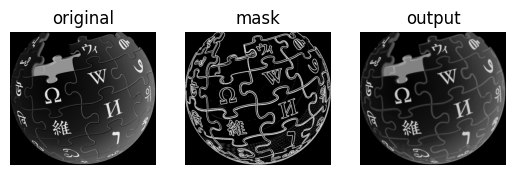

In [4]:
wikipedia = cv2.imread('data/wikipedia_black.png', 0)

k = 0.15
mask = wikipedia - cv2.GaussianBlur(wikipedia, (11, 11), 0)
unsharped = wikipedia + k * mask

plot_images(wikipedia, 'original', mask, 'mask', unsharped, 'output')

### Gradient of an image

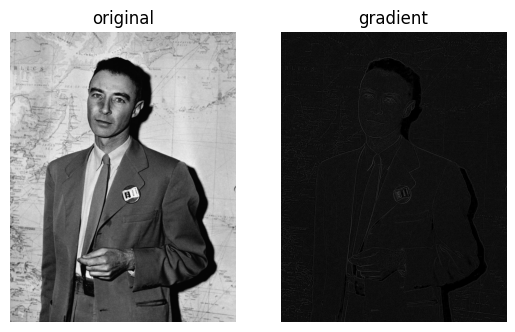

In [5]:
oppenheimer = cv2.imread('data/oppenheimer.jpg', 0)

grad_squared = cv2.Laplacian(oppenheimer, -1)
grad = np.sqrt(grad_squared)

plot_images(oppenheimer, 'original', grad, 'gradient')

### Compare box filter and gaussian filter

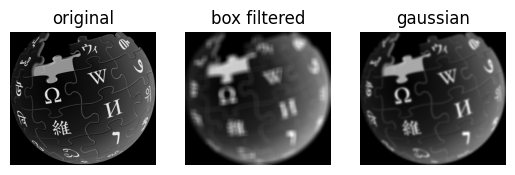

In [6]:
box_filtered = cv2.blur(wikipedia, (51, 51))
gaussian = cv2.GaussianBlur(wikipedia, (51, 51), 0)

plot_images(wikipedia, 'original', box_filtered, 'box filtered', gaussian, 'gaussian')

### Edge detection

**Robert cross-gradient**

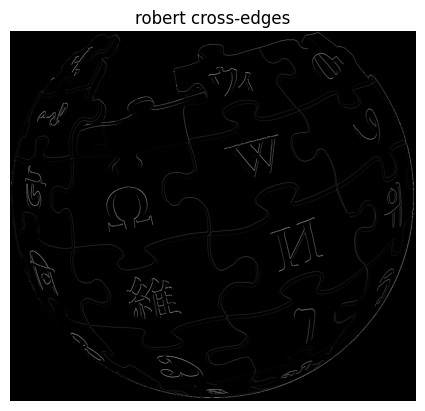

In [7]:
kernel_A = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]]) # da z9 - z5 component
A = cv2.filter2D(wikipedia, -1, kernel_A)

kernel_B = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
B = cv2.filter2D(wikipedia, -1, kernel_B)

robert_edges = abs(A) + abs(B)

plot_images(robert_edges, 'robert cross-edges')

**Sobel operators**

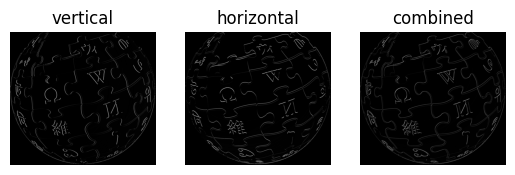

In [8]:
vertical = cv2.Sobel(wikipedia, ddepth=0, dx=1, dy=0)
horizontal = cv2.Sobel(wikipedia, ddepth=0, dx=0, dy=1)
combined = cv2.addWeighted(vertical, 0.5, horizontal, 0.5, 0)
plot_images(vertical, 'vertical', horizontal, 'horizontal', combined, 'combined')

**Canny edge detection**

Read [this article](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123) explaining how it works under the hood.

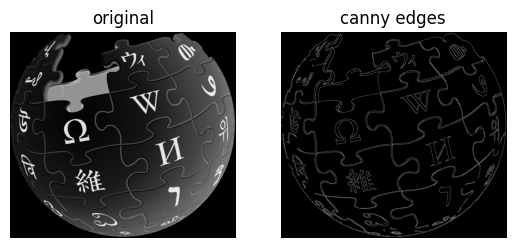

In [28]:
edges = cv2.Canny(wikipedia, threshold1=100, threshold2=200)
plot_images(wikipedia, 'original', edges, 'canny edges')